In [337]:

## read mouse
## plot mouse speed over time

import glob
import pandas as pd

path = '/Users/rubythurs/Documents/dataProcess/smogMouse/'
#'C:/Users/ZHT/Documents/dataProcess/Smog_mouse'
files  = glob.glob(path + '/*.json') 
files = sorted(files)
smog_mouse =[]

for file in files:
    data = pd.read_json(file)
    filedata = {'filename':file, 'df':data}
    print(filedata['filename'])
    print(filedata['df'].shape)
    smog_mouse.append(filedata)

/Users/rubythurs/Documents/dataProcess/smogMouse/HY.json
(3658, 3)
/Users/rubythurs/Documents/dataProcess/smogMouse/Jia.json
(8786, 3)
/Users/rubythurs/Documents/dataProcess/smogMouse/Xiaohcun.json
(13189, 3)
/Users/rubythurs/Documents/dataProcess/smogMouse/Ziyi-2024.json
(4991, 3)
/Users/rubythurs/Documents/dataProcess/smogMouse/zht.json
(4870, 3)


In [338]:

## read mouse
## plot mouse speed over time

import glob
import pandas as pd

path = '/Users/rubythurs/Documents/dataProcess/smogFrame/'
#'C:/Users/ZHT/Documents/dataProcess/Smog_frame'
files  = glob.glob(path + '/*.json') 
files = sorted(files)
smog_frame =[]

for file in files:
    data = pd.read_json(file)
    filedata = {'filename':file, 'df':data}
    print(filedata['filename'])
    print(filedata['df'].shape)
    smog_frame.append(filedata)

/Users/rubythurs/Documents/dataProcess/smogFrame/HY.json
(8398, 5)
/Users/rubythurs/Documents/dataProcess/smogFrame/Jia.json
(11605, 5)
/Users/rubythurs/Documents/dataProcess/smogFrame/Xiaochun.json
(25009, 5)
/Users/rubythurs/Documents/dataProcess/smogFrame/Ziyi.json
(9687, 5)
/Users/rubythurs/Documents/dataProcess/smogFrame/zht.json
(11362, 5)


In [353]:
import numpy as np

individual = 0

smogframe0 = smog_frame[individual]['df']
tkept = smogframe0['timeStamp']

#pd.options.mode.chained_assignment = None
df = smog_mouse[individual]['df']
mouse = df[df['timestamp'].isin(tkept)]
mouse['mouseX'] = mouse['mousePOs'].apply(lambda x: x['X'])
mouse['mouseY'] = mouse['mousePOs'].apply(lambda x: x['Y'])
mouse['timeStamp']=mouse['timestamp']
mouse = mouse.drop(columns=['mousePOs','timestamp'])



/var/folders/9d/228cbhrj7gx34xplc04_qy100000gn/T/ipykernel_34093/2290786825.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mouse['mouseX'] = mouse['mousePOs'].apply(lambda x: x['X'])
/var/folders/9d/228cbhrj7gx34xplc04_qy100000gn/T/ipykernel_34093/2290786825.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mouse['mouseY'] = mouse['mousePOs'].apply(lambda x: x['Y'])
/var/folders/9d/228cbhrj7gx34xplc04_qy100000gn/T/ipykernel_34093/2290786825.py:13: SettingWithCopyWarning: 
A value is trying to be se

In [358]:
smog_frame[individual]['df']

,frameTag,targetpos,cannonpos,ponPos,timeStamp
0,1,"[{'X': 1122.91406, 'Y': 344.3159}, {'X': 1234....","[{'X': 688.082, 'Y': 607.182556}, {'X': 717.34...",[],2024-08-25 08:52:11.687
1,2,"[{'X': 1122.91406, 'Y': 344.3159}, {'X': 1234....","[{'X': 688.082, 'Y': 607.182556}, {'X': 717.34...",[],2024-08-25 08:52:11.712
2,3,"[{'X': 1122.91406, 'Y': 344.3159}, {'X': 1234....","[{'X': 688.082, 'Y': 607.182556}, {'X': 717.34...",[],2024-08-25 08:52:11.730
3,4,"[{'X': 1122.91406, 'Y': 344.3159}, {'X': 1234....","[{'X': 688.082, 'Y': 607.182556}, {'X': 717.34...",[],2024-08-25 08:52:11.749
4,5,"[{'X': 1122.91406, 'Y': 344.3159}, {'X': 1234....","[{'X': 688.082, 'Y': 607.182556}, {'X': 717.34...",[],2024-08-25 08:52:11.769
...,...,...,...,...,...
8393,8394,"[{'X': 1159.931, 'Y': 444.0809}, {'X': 1229.07...","[{'X': 1291.81641, 'Y': 607.1457}, {'X': 1316....",[],2024-08-25 08:54:59.547
8394,8395,"[{'X': 1159.931, 'Y': 444.0809}, {'X': 1229.07...","[{'X': 1291.81641, 'Y': 607.1457}, {'X': 1316....",[],2024-08-25 08:54:59.568
8395,8396,"[{'X': 1159.931, 'Y': 444.0809}, {'X': 1229.07...","[{'X': 1291.81641, 'Y': 607.1457}, {'X': 1316....",[],2024-08-25 08:54:59.588
8396,8397,"[{'X': 1159.931, 'Y': 444.0809}, {'X': 1229.07...","[{'X': 1291.81641, 'Y': 607.1457}, {'X': 1316....",[],2024-08-25 08:54:59.607


In [359]:
smogf = smog_frame[individual]['df'].copy()
smogf = smogf[smogf['ponPos'].apply(lambda x: x != [])]

def framePonSplit(i,df):
    df[f'{i}_ponX'] = df['ponPos'].apply(lambda x: x[i]['X'])
    df[f'{i}_ponY'] = df['ponPos'].apply(lambda x: x[i]['Y'])
    df[f'{i}_tarX'] = df['targetpos'].apply(lambda x: x[i]['X'])
    df[f'{i}_tarY'] = df['targetpos'].apply(lambda x: x[i]['Y'])
    
    return df
    #print(df.shape)

smogf.reset_index(inplace=True)
for i in range(5):
    df = framePonSplit(i,smogf)

def mergeclean(i,mouse_frame_merge):
    return  mouse_frame_merge[['timeStamp','mouseX','mouseY',
                               f'{i}_tarX',f'{i}_tarY']]
                               #f'{i}_ponX',f'{i}_ponY']]

mouse_frame_merge = pd.merge(mouse, smogf, on='timeStamp')
merge1 = mergeclean(1,mouse_frame_merge)

(0.0, 1080.0)

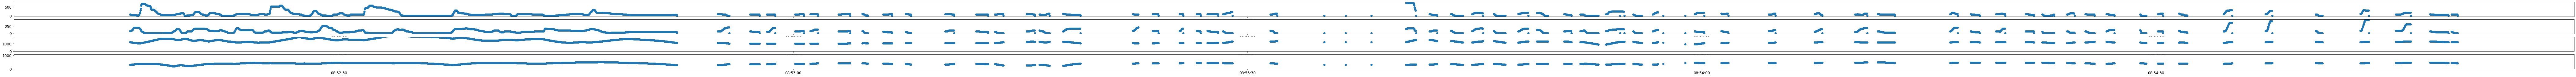

In [360]:
import matplotlib.pyplot as plt
#import mpld3
#mpld3.enable_notebook()
m =merge1
fig, ax = plt.subplots(4,1, figsize=(150, 4))
ax[0].scatter(m['timeStamp'],m['mouseX'])
ax[1].scatter(m['timeStamp'],m['mouseY'])
ax[2].scatter(m['timeStamp'],m['1_tarX'])
ax[2].set_ylim(0, 1920)
ax[3].scatter(m['timeStamp'],m['1_tarY'])
ax[3].set_ylim(0, 1080)

In [363]:
m1 = merge1.copy()
m1['timeStamp'] =m1['timeStamp'].apply(lambda x: x.timestamp()*1000)
t_ = m1['timeStamp'].min()
m1['timeStamp'] = m1['timeStamp']-t_
m1

,timeStamp,mouseX,mouseY,1_tarX,1_tarY
0,0.0,82.0,75.0,1211.96716,296.781500
1,19.0,72.0,80.0,1208.85315,297.606171
2,40.0,64.0,83.0,1203.74109,298.677900
3,59.0,60.0,85.0,1197.88700,299.847656
4,80.0,57.0,94.0,1190.73352,301.689600
...,...,...,...,...,...
3495,153648.0,81.0,3.0,1224.44092,418.948000
3496,153658.0,81.0,3.0,1225.95154,417.629639
3497,153678.0,81.0,3.0,1227.51300,416.266700
3498,153699.0,81.0,3.0,1229.07886,414.899933


Text(0.5, 1.0, 'Mouse speed relation to target speed')

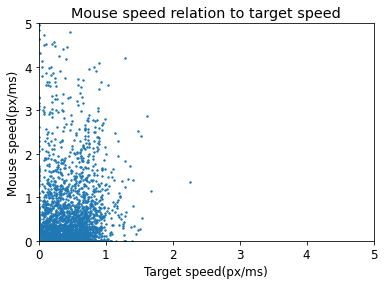

In [367]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

mspeed = []
pspeed = []
mx= list(m1['mouseX'])
my =list(m1['mouseY']) 
t = list(m1['timeStamp'])
px = list(m1['1_tarX'])
py = list(m1['1_tarY'])

for i in range(1,m1.shape[0]-1):
    x2 = ((mx[i+1]-mx[i-1])**2 + (my[i+1]-my[i-1])**2)**0.5
    x1 = ((mx[i]-mx[i-1])**2 + (my[i]-my[i-1])**2)**0.5
    v= max(x2/(t[i]-t[i-1]), x1/(t[i+1]-t[i]))
    mspeed.append(v)
    px2 = ((px[i+1]-px[i-1])**2 + (py[i+1]-py[i-1])**2)**0.5
    px1 = ((px[i]-px[i-1])**2 + (py[i]-py[i-1])**2)**0.5
    vp= max(px2/(t[i]-t[i-1]), px1/(t[i+1]-t[i]))
    pspeed.append(vp)

plt.rcParams['font.size'] = 12
plt.scatter(pspeed,mspeed,s=2)
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel('Target speed(px/ms)')
plt.ylabel('Mouse speed(px/ms)')
plt.title('Mouse speed relation to target speed')

In [245]:
c,_ = pearsonr(pspeed,mspeed)
print(c,_)
cx,cx_ = pearsonr(mx,px)
print(cx,cx_)
cy,cy_ = pearsonr(my,py)
print(cy,cy_)
cxy,xy_ = pearsonr(mx,my)
print(cxy,xy_)
mxy,mxy_ = pearsonr(px,py)
print(mxy,mxy_)

-0.0016042977858654343 0.9244335233740123
0.002393331242498256 0.8874425634011647
-0.005675714910520689 0.7371253235219439
0.1384646555552586 1.8970376144206255e-16
-0.999925590231308 0.0


Δd = sqrt( (x2-x1)^2 + (y2-y1)^2 )  # 位移变化量（欧氏距离）
Δt = t2 - t1                        # 时间变化量
velocity = Δd / Δt                   # 瞬时速度（像素/秒）

/var/folders/9d/228cbhrj7gx34xplc04_qy100000gn/T/ipykernel_34093/1086445247.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(b)


Text(0.5, 1.0, 'Mouse Speed over Time')

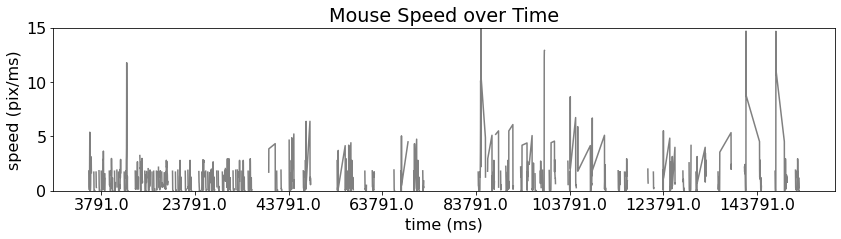

In [302]:
import matplotlib.pyplot as plt

moindex = list(mouse.index)
breakidx = []

for i in range(0,len(moindex)-1):
   if moindex[i+1]-moindex[i]>1:
      breakidx.append(moindex[i])
    
fig, ax = plt.subplots(figsize=(14, 3))
for l in range(0,len(breakidx)-2):
    start = breakidx[l]
    end = breakidx[l+1]

    m = mouse.loc[start:end]
    x=list(m['mouseX'])
    y = list(mouse['mouseY'])
    t = list(m['timeStamp'])
    t = list(map(lambda x: x.timestamp()*1000, t))# in ms

    dlist=[]
    for i in range(1,len(x)-2):
        x2 = ((x[i+1]-x[i-1])**2 + (y[i+1]-y[i-1])**2)**0.5
        x1 = ((x[i]-x[i-1])**2 + (y[i]-y[i-1])**2)**0.5
        d = max(x2/(t[i]-t[i-1]), x1/(t[i+1]-t[i]))
        dlist.append(d)
    tlist = t[1:]
    tlist = tlist[:-2]
    ax.plot(tlist[10:50],dlist[10:50],c='grey')
    ax.set_ylim(0, 15)

a = ax.get_xticks()
tmin = mouse['timeStamp'].min().timestamp()*1000
b = a-tmin
plt.rcParams['font.size'] = 16
ax.set_xticklabels(b)
ax.set_xlabel('time (ms)')
ax.set_ylabel('speed (pix/ms)')
ax.set_title('Mouse Speed over Time')


In [ ]:
import matplotlib.pyplot as plt
#import mpld3
#mpld3.enable_notebook()

fig, ax = plt.subplots(2,1, figsize=(80, 4))
ax[0].scatter(smog_mouse[0]['df']['timestamp'],smog_mouse[0]['df']['buttonUP'])



In [ ]:
plt.figure(figsize=(19,10))
plt.scatter(smog_mouse[0]['df']['X'],smog_mouse[0]['df']['Y'])

plt.xlim(0, 1920)
plt.ylim(0, 1080)

In [ ]:

mouse_frame_merge


In [ ]:

import seaborn as sns
dfcorr = mouse_frame_merge[['mouseX','mouseY','ponX','ponY']]
dfcorr.isnull().any()
vmax=1
vmin1=0
sns.heatmap(dfcorr,annot=False , vmin=vmin1, vmax=vmax)